In [1]:
using PythonPlot
using NCDatasets
using GeoDatasets
using Statistics
using GeoMapping
using PhysOcean
using Dates
using CoastalCurrents
using Dates
using DIVAnd
using DIVAnd_HFRadar
using ProgressMeter

In [2]:
#=
cycle_003_fld = raw"C:/Users/jmlc0/Documents/FRIA_data_notebooks/SWOT_21_day_Expert/Cycle_003/";
cycle_003_file = readdir(cycle_003_fld)
fnames = joinpath.(cycle_003_fld,cycle_003_file);
=#
cycle_005_fld = raw"C:/Users/jmlc0/Documents/FRIA_data_notebooks/SWOT_21_day_Expert/Cycle_005/";
cycle_005_file = readdir(cycle_005_fld)
fnames = joinpath.(cycle_005_fld,cycle_005_file);

In [3]:
function set_aspect_ratio(aspect_ratio::Float64)
    gca().set_aspect(aspect_ratio)
end 
# loading bathymetry
# Loading the GeoDatasets data for the land mask

"

Load the land-sea-lake raster from basemap: 0 is ocean, 1 is land and 2 is lake. 
grid is the resolution in arc minutes and should be either 1.25, 2.5, 5 or 10.
The parameter resolution should be either 'c','l','i','h' or 'f'
(standing for crude, low, intermediate, high and full resolution)

"


resolution='h' 
#grids=1.25
mlon,mlat,mdata = GeoDatasets.landseamask(;resolution=resolution,grid=1.25);

#= Delimit the bounding box
lon_min = -10.2333
lon_max = 0.333
lat_min = 40.333
lat_max = 50.333
=#
lon_min = -15.2333
lon_max = 5.333
lat_min = 30.333
lat_max = 50.333


# Find indices for the region
lon_indices = findall(lon -> lon_min <= lon <= lon_max, mlon)
lat_indices = findall(lat -> lat_min <= lat <= lat_max, mlat)

# Extract the specific region
mlon_subset = mlon[lon_indices]
mlat_subset = mlat[lat_indices]
mdata_subset = mdata[lon_indices, lat_indices];

# Check the dimensions of the subset
@show size(mlon_subset)
@show size(mlat_subset)
@show size(mdata_subset)

size(mlon_subset) = (987,)
size(mlat_subset) = (960,)
size(mdata_subset) = (987, 960)


(987, 960)

In [15]:
# Module to extract the variable form a specific file
#i = 230
i = 168
ds = NCDataset(fnames[i])
@show fnames[i]
lon = nomissing(mod.(ds["longitude"][:,:] .+ 180,360) .-180,NaN);
lat = nomissing(ds["latitude"][:,:],NaN);
ssha = nomissing(ds["ssha"][:,:],NaN);
mdt = nomissing(ds["ssha"][:,:],NaN);
ugos = nomissing(ds["ugos"][:,:],NaN);
vgos = nomissing(ds["vgos"][:,:],NaN);
oc_td = nomissing(ds["ocean_tide"][:,:],NaN);
#t0  = DateTime(1950,01,01,00,00,00,0000)  # or parse from ds["time"].attrib["units"]
#time_alt = t0 .+ Microsecond.(ds["time"].var[:]);
time = ds["time"][:];
close(ds)

 # Obtaining Absolute Dynamic Topography
adt = ssha .+ mdt;
speed = sqrt.(ugos.^2 + vgos.^2);

fnames[i] = "C:/Users/jmlc0/Documents/FRIA_data_notebooks/SWOT_21_day_Expert/Cycle_005/SWOT_L3_LR_SSH_Expert_005_169_20231018T163712_20231018T172838_v1.0.nc"


In [16]:
time[1]

2023-10-18T16:37:12.317

In [17]:
lonr = [-13,0]
latr= [40,50]
#Creating the selection indices
sel = lonr[1] .<= lon .<= lonr[2] .&& latr[1] .<= lat .<= latr[2];
# Assigning the selection to an index
ind = findall(sel);

# testing the creation of the cartesian index ------> check if the indexes work for both ascending and descending orbits
typeof(ind)
println(ind[1])
println(ind[end])

# asigning the values for the maximum and minimum boundaries
mini, maxi = extrema([i[1] for i in ind])
minj, maxj = extrema([i[2] for i in ind])

CartesianIndex(1, 7173)
CartesianIndex(69, 7765)


(7173, 7765)

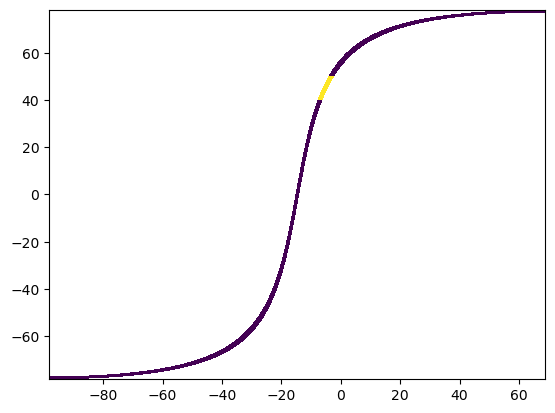

Python: <matplotlib.collections.QuadMesh object at 0x0000023F5B49EEA0>

In [18]:
pcolormesh(lon,lat,sel)

In [19]:
lon_sub = lon[mini:maxi,minj:maxj]
lat_sub = lat[mini:maxi,minj:maxj];

In [20]:
ugos_sub = ugos[mini:maxi,minj:maxj]
vgos_sub = vgos[mini:maxi,minj:maxj];
speed_sub = sqrt.(ugos_sub.^2 + vgos_sub.^2);

In [43]:
# Selecting the area
mdt_sub = mdt[mini:maxi,minj:maxj]
lon_sub = lon[mini:maxi,minj:maxj]
lat_sub = lat[mini:maxi,minj:maxj];
adt_sub = adt[mini:maxi,minj:maxj]
ssha_sub = ssha[mini:maxi,minj:maxj]
oc_td_sub = oc_td[mini:maxi,minj:maxj]
ugos_sub = ugos[mini:maxi,minj:maxj]
vgos_sub = vgos[mini:maxi,minj:maxj];
speed_sub = sqrt.(ugos_sub.^2 + vgos_sub.^2);

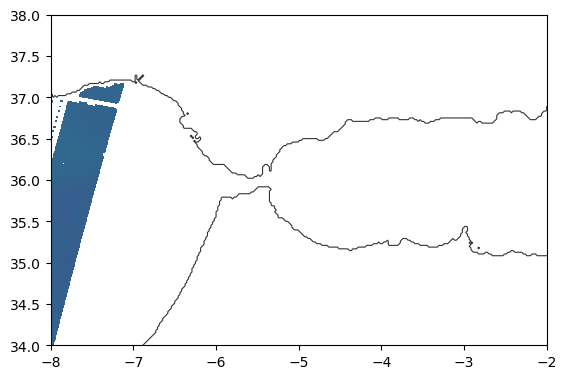

Python: None

In [22]:
pcolormesh(lon,lat,adt)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-8,-2)
ylim(34,38)
set_aspect_ratio(1.0)

In [ ]:
figure(figsize=(15,8))
subplot(1,2,1)
pcolormesh(lon_sub,lat_sub,adt_sub,cmap="jet")
colorbar()
clim(0,0.7)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-11,-1)
ylim(42,49)
set_aspect_ratio(1.0)

subplot(1,2,2)
quiver(lon_sub,lat_sub,ugos_sub,vgos_sub,speed_sub)
colorbar()
clim(0,0.7)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-11,-1)
ylim(42,49)
set_aspect_ratio(1.0)

show()

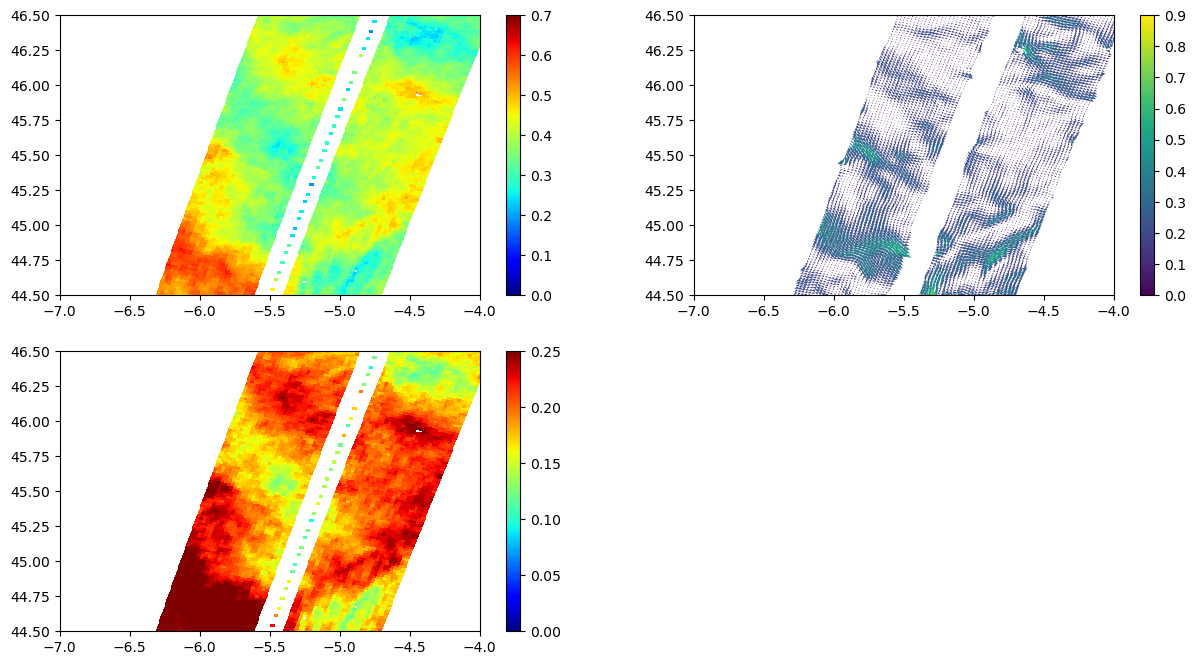

In [47]:
figure(figsize=(15,8))
subplot(2,2,1)
pcolormesh(lon_sub,lat_sub,adt_sub,cmap="jet")
colorbar()
clim(0,0.7)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-7,-4)
ylim(44.5,46.5)
set_aspect_ratio(1.0)

subplot(2,2,2)
quiver(lon_sub,lat_sub,ugos_sub,vgos_sub,speed_sub,scale=20)
colorbar()
clim(0,0.9)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-7,-4)
ylim(44.5,46.5)
set_aspect_ratio(1.0)

subplot(2,2,3)
pcolormesh(lon_sub,lat_sub,mdt_sub,cmap="jet")
colorbar()
clim(0,0.25)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-7,-4)
ylim(44.5,46.5)
set_aspect_ratio(1.0)


show()

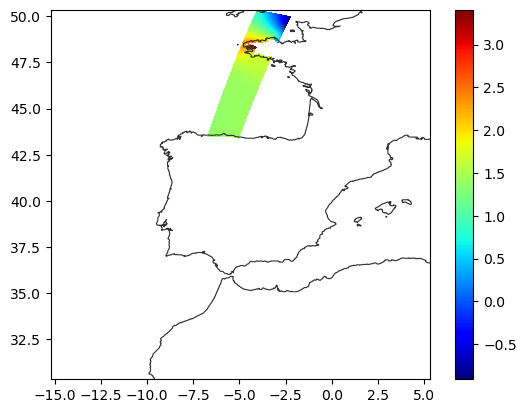

Python: None

In [41]:
pcolormesh(lon_sub,lat_sub,oc_td_sub,cmap="jet")
colorbar()
#clim(0,0.7)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
set_aspect_ratio(1.0)


## DIVAnd Gridding using CoastalCurrents export

In [12]:
dlon = dlat = 0.03
lonr = -12:dlon:0
latr = 40:dlat:50
bathname = raw"C:\Users\jmlc0\Documents\FRIA_data_notebooks\~\tmp\BlueCloud2026\gebco_30sec_4.nc"
bathisglobal = true

true

In [13]:
mask,(pm,pn),(xi,yi) = DIVAnd.domain(bathname,bathisglobal,lonr,latr)
mask = DIVAnd.floodfill(mask) .== 1
hx, hy, h = DIVAnd.load_bath(bathname, bathisglobal, lonr, latr);

In [ ]:
directionobs = atand.(ugos,vgos);

robs = speed;

In [ ]:
valid = isfinite.(robs);
x = lon[valid];
y = lat[valid];
robs = robs[valid];
directionobs = directionobs[valid];

len = 3e3
epsilon2 = 2.
eps2_boundary_constraint = -1
eps2_div_constraint = 1
g = 0;

In [18]:
uri,vri,ηi = DIVAndrun_HFRadar(
    mask,h,(pm,pn),(xi,yi),(x,y),robs,directionobs,len,epsilon2;
    eps2_boundary_constraint = eps2_boundary_constraint,
    eps2_div_constraint = eps2_div_constraint,
    # eps2_Coriolis_constraint = -1,
    # f = 0.001,
    # residual = residual,
    # g = g,
    # ratio = 100,
    # lenη = (000.0, 000.0, 24 * 60 * 60. * 10),
    # maxit = 100000,
    # tol = 1e-6,
);
     

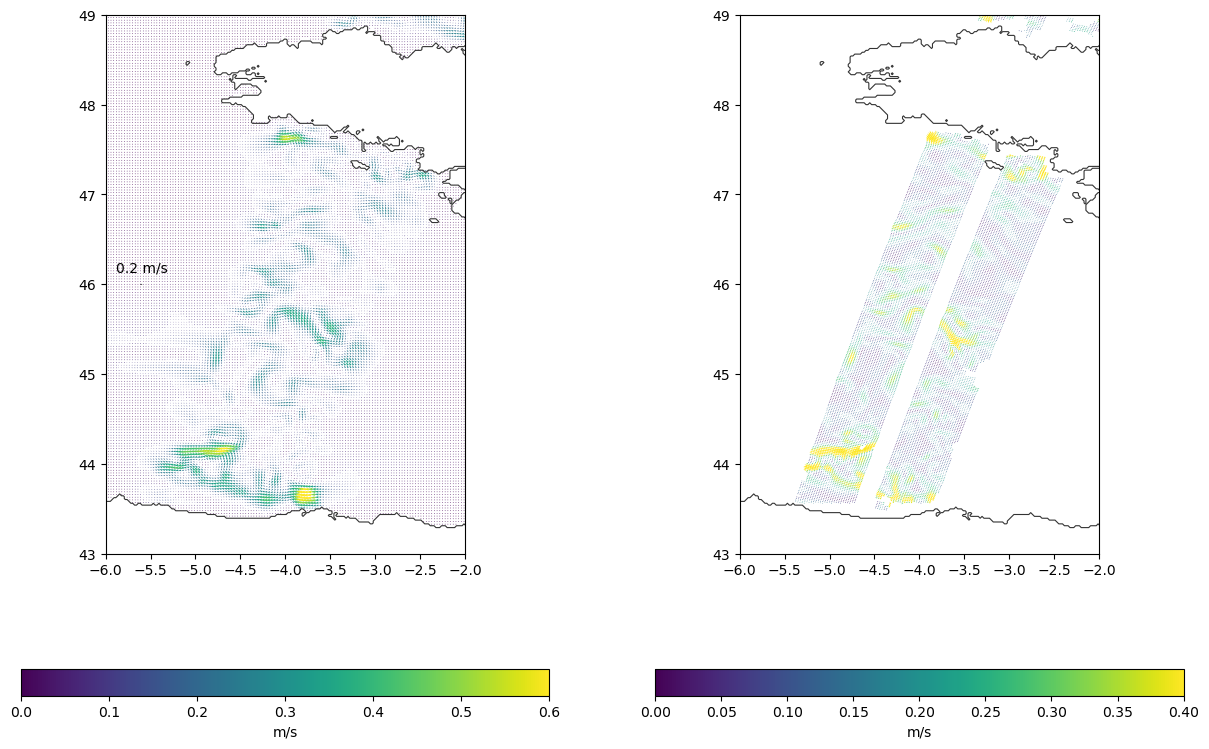

In [20]:
color = sqrt.(uri.^2 + vri.^2)
clf()

figure(figsize=(15,10))
subplot(1,2,1)
r = CartesianIndices(( 1:2:size(mask,1) ,1:2:size(mask,2)))
r = CartesianIndices(( 1:1:size(mask,1) ,1:1:size(mask,2)))
q = quiver(xi[r],yi[r],uri[r],vri[r],color[r])
quiverkey(q,0.1,0.5,0.2,"0.2 m/s")
colorbar(orientation="horizontal",label="m/s")
clim(0,0.6)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-6,-2)
ylim(43,49)
set_aspect_ratio(1.0)
#CoastalCurrents.Plotting.plotmap(bathname)

#title("surface current " * join(Dates.format.((minimum(timea),maximum(timea)),"yyyy-mm-dd")," - "));
subplot(1,2,2)
quiver(lon_sub,lat_sub,ugos_sub,vgos_sub,speed_sub)
colorbar(orientation="horizontal",label="m/s")
clim(0,0.4)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-6,-2)
ylim(43,49)
set_aspect_ratio(1.0)

show()

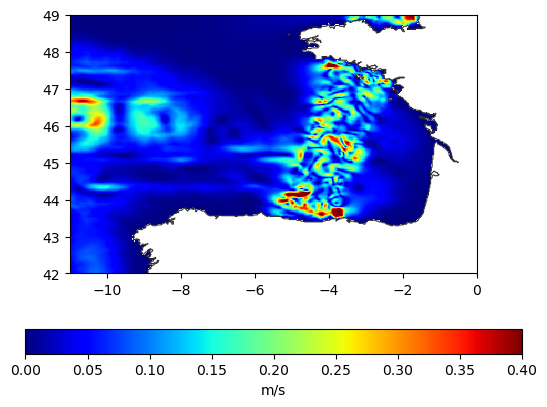

Python: None

In [21]:
pcolormesh(xi[r],yi[r],color[r],cmap="jet")
colorbar(orientation="horizontal",label="m/s")
clim(0,0.4)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-11,-0)
ylim(42,49)
set_aspect_ratio(1.0)

In [19]:
# Trying selecting the time of specific files

sel = @. Dates.DateTime(2023,9,1) <= timea < Dates.DateTime(2023,10,30)

LoadError: UndefVarError: `timea` not defined

In [92]:
ds = NCDataset(fnames[1])
DateTime(1950,01,01,00,00,00,000) .+ Microsecond.(ds["time"].var[:])


9860-element Vector{DateTime}:
 2023-09-06T23:58:31.750
 2023-09-06T23:58:32.063
 2023-09-06T23:58:32.376
 2023-09-06T23:58:32.689
 2023-09-06T23:58:33.003
 2023-09-06T23:58:33.316
 2023-09-06T23:58:33.629
 2023-09-06T23:58:33.942
 2023-09-06T23:58:34.255
 2023-09-06T23:58:34.568
 2023-09-06T23:58:34.881
 2023-09-06T23:58:35.194
 2023-09-06T23:58:35.508
 ⋮
 2023-09-07T00:49:55.134
 2023-09-07T00:49:55.451
 2023-09-07T00:49:55.769
 2023-09-07T00:49:56.086
 2023-09-07T00:49:56.403
 2023-09-07T00:49:56.721
 2023-09-07T00:49:57.038
 2023-09-07T00:49:57.355
 2023-09-07T00:49:57.673
 2023-09-07T00:49:57.990
 2023-09-07T00:49:58.307
 2023-09-07T00:49:58.625

In [8]:
function load_full(fname::AbstractString)
    @debug "loading $fname"
    ds = NCDataset(fname)
    lon = nomissing(mod.(ds["longitude"][:,:] .+ 180,360) .-180,NaN);
    lat = nomissing(ds["latitude"][:,:],NaN);
    ssha = nomissing(ds["ssha"][:,:],NaN);
    mdt = nomissing(ds["mdt"][:,:],NaN);
    ugos = nomissing(ds["ugos"][:,:],NaN);
    vgos = nomissing(ds["vgos"][:,:],NaN);
    oc_td = nomissing(ds["ocean_tide"][:,:],NaN);
    time = ds["time"][:];  # modification, NCDataset or SWOT dataset Update
  
    #= Previously needed for the microseconds unit
    # or parse from ds["time"].attrib["units"]
    time_total = DateTime(1950,01,01,00,00,00,000) .+ Microsecond.(ds["time"].var[:]);
    =#
    # Obtaining Absolute Dynamic Topography
    adt = ssha .+ mdt;
    speed = sqrt.(ugos.^2 + vgos.^2);
    close(ds)
    return speed,ugos,vgos,mdt,lon,lat,time
end

load_full (generic function with 1 method)

In [9]:
speed,ugos,vgos,adt,lon,lat,time_total = load_full(fnames[168])

([NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN], [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN], [NaN NaN … NaN NaN; NaN NaN … NaN NaN; … ; NaN NaN … NaN NaN; NaN NaN … NaN NaN], [-1.1074000000000002 -1.1074000000000002 … -0.2888 -0.2887; -1.1074000000000002 -1.1074000000000002 … -0.28750000000000003 -0.2873; … ; -1.109 -1.109 … -0.2059 -0.2084; -1.109 -1.109 … -0.2023 -0.2048], [-98.16582399999999 -98.08601200000004 … 68.65854999999999 68.746782; -98.16585700000002 -98.08593300000001 … 68.658943 68.747039; … ; -98.16831100000002 -98.08021400000001 … 68.682502 68.762427; -98.16835200000003 -98.08011800000003 … 68.682827 68.76263899999998], [-77.053767 -77.05376199999999 … 78.271953 78.272019; -77.071682 -77.071677 … 78.25404 78.254106; … ; -78.25402799999999 -78.25402299999999 … 77.071704 77.071764; -78.271942 -78.271936 … 77.053789 77.053849], [DateTime("2023-10-18T16:37:12.317"), DateTime("2023-10-18T16:37:12.569"), 

In [3]:
file_indices= [13, 54, 81, 204, 230, 258, 273, 286, 301, 329, 357]

11-element Vector{Int64}:
  13
  54
  81
 204
 230
 258
 273
 286
 301
 329
 357

In [4]:
fnames_bob = fnames[file_indices]

11-element Vector{String}:
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T101553_20230907T110720_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T230807_20230908T235933_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T230838_20230910T000004_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T083637_20230914T092804_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T083708_20230915T092835_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T083739_20230916T092906_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T212922_20230916T222048_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T083810_20230917T092937_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T212953_20230917T222119_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T213024_20230918T222150_v0.3.nc"
 "C:/Users/jmlc0/Documents/FRIA_d" ⋯ 81 bytes ⋯ "T213054_20230919T222221_v0.3.nc"

In [9]:
fnames[file_indices][11]

"C:/Users/jmlc0/Documents/FRIA_data_notebooks/SWOT_21_day_Expert/Cycle_003/SWOT_L3_LR_SSH_Expert_003_531_20230919T213054_20230919T222221_v0.3.nc"

In [ ]:
function load_complete(fnames,lonr,latr)
    @info "check complete files"
    complete = @showprogress [Altimetry.iscomplete(fname) for fname in fnames]

    fnames = fnames[complete]
#=
    @debug begin
        @show fnames[.!complete]
    end
=#
    @info "load files"
    data = @showprogress [load(fname,lonr,latr) for fname in fnames]
    return ntuple(i -> reduce(vcat,getindex.(data,i)),7);
end

In [ ]:
function load(fnames::Vector{<:AbstractString},lonr,latr)
    sla,slaf,mdt,lon,lat,time,id = load(fname)
    sel = (lonr[1] .<= lon .<= lonr[end]) .& (latr[1] .<= lat .<= latr[end])
    return sla[sel],slaf[sel],mdt[sel],lon[sel],lat[sel],time[sel],id[sel]
end

In [ ]:
speed,ugos,vgos,adt,lon,lat,time_total = load_complete(fnames_bob,lonr,latr)

## Subsetting and selecting the area of study

Up until this point the du

In [28]:
lon_sub = lon[mini:maxi,minj:maxj]
lat_sub = lat[mini:maxi,minj:maxj];
adt_sub = adt[mini:maxi,minj:maxj]
ssha_sub = ssha[mini:maxi,minj:maxj]
oc_td_sub = oc_td[mini:maxi,minj:maxj]
ugos_sub = ugos[mini:maxi,minj:maxj]
vgos_sub = vgos[mini:maxi,minj:maxj];
speed_sub = sqrt.(ugos_sub.^2 + vgos_sub.^2);

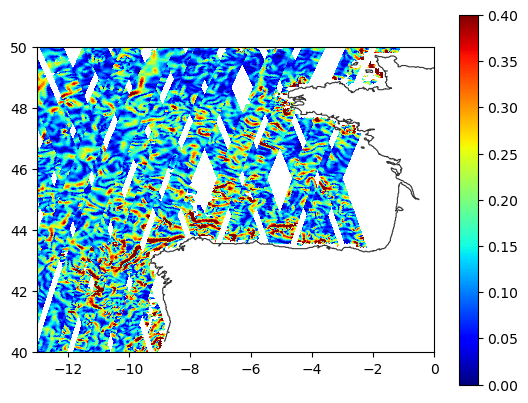

Python: None

In [56]:
pcolormesh(lon,lat,speed,cmap="jet")
colorbar()
clim(0,0.4)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-13,0)
ylim(40,50)
set_aspect_ratio(1.0)

In [57]:
adt

759×9860 Matrix{Float64}:
 -0.0475  -0.0495  -0.0518  -0.0544  …  -1.2389  -1.239   -1.239   -1.239
 -0.0487  -0.0506  -0.0529  -0.0555     -1.2389  -1.239   -1.239   -1.239
 -0.0498  -0.0516  -0.0539  -0.0565     -1.2389  -1.239   -1.239   -1.2391
 -0.051   -0.0527  -0.055   -0.0576     -1.2389  -1.239   -1.239   -1.2391
 -0.0521  -0.0538  -0.056   -0.0587     -1.2389  -1.239   -1.239   -1.2391
 -0.0533  -0.0548  -0.057   -0.0597  …  -1.2389  -1.239   -1.239   -1.2391
 -0.0545  -0.0558  -0.0579  -0.0608     -1.2389  -1.239   -1.2391  -1.2391
 -0.0557  -0.0567  -0.0588  -0.0618     -1.2389  -1.239   -1.2391  -1.2391
 -0.0569  -0.0577  -0.0597  -0.0628     -1.239   -1.239   -1.2391  -1.2391
 -0.0582  -0.0586  -0.0606  -0.0639     -1.239   -1.239   -1.2391  -1.2391
 -0.0594  -0.0596  -0.0615  -0.0649  …  -1.239   -1.239   -1.2391  -1.2391
 -0.0606  -0.0605  -0.0624  -0.066      -1.239   -1.239   -1.2391  -1.2391
 -0.0618  -0.0615  -0.0634  -0.0671     -1.239   -1.239   -1.2391  -1.2391
 

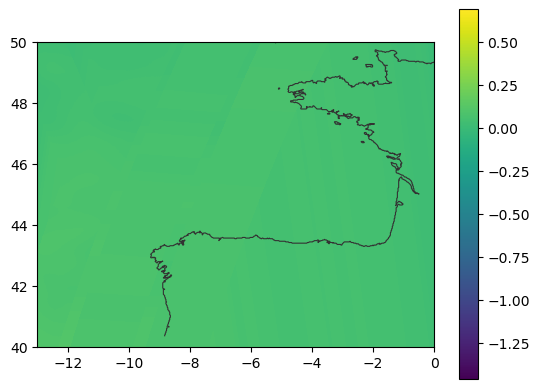

Python: None

In [61]:
pcolormesh(lon,lat,adt)
colorbar()
#clim(0,0.05)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
xlim(-13,0)
ylim(40,50)
set_aspect_ratio(1.0)

In [102]:
278939400 - 19424884

259514516

In [64]:
dlon = dlat = 0.03
lonr = -12:dlon:0
latr = 40:dlat:50
bathname = raw"C:\Users\jmlc0\Documents\FRIA_data_notebooks\~\tmp\BlueCloud2026\gebco_30sec_4.nc"
bathisglobal = true

mask,(pm,pn),(xi,yi) = DIVAnd.domain(bathname,bathisglobal,lonr,latr)
mask = DIVAnd.floodfill(mask) .== 1
hx, hy, h = DIVAnd.load_bath(bathname, bathisglobal, lonr, latr);

directionobs = atand.(ugos,vgos);

robs = speed;

valid = isfinite.(robs);
x = lon[valid];
y = lat[valid];
robs = robs[valid];
directionobs = directionobs[valid];

len = 3e3
epsilon2 = 2.
eps2_boundary_constraint = -1
eps2_div_constraint = 1
g = 0;

In [65]:
uri,vri,ηi = DIVAndrun_HFRadar(
    mask,h,(pm,pn),(xi,yi),(x,y),robs,directionobs,len,epsilon2;
    eps2_boundary_constraint = eps2_boundary_constraint,
    eps2_div_constraint = eps2_div_constraint,
    # eps2_Coriolis_constraint = -1,
    # f = 0.001,
    # residual = residual,
    # g = g,
    # ratio = 100,
    # lenη = (000.0, 000.0, 24 * 60 * 60. * 10),
    # maxit = 100000,
    # tol = 1e-6,
);
     

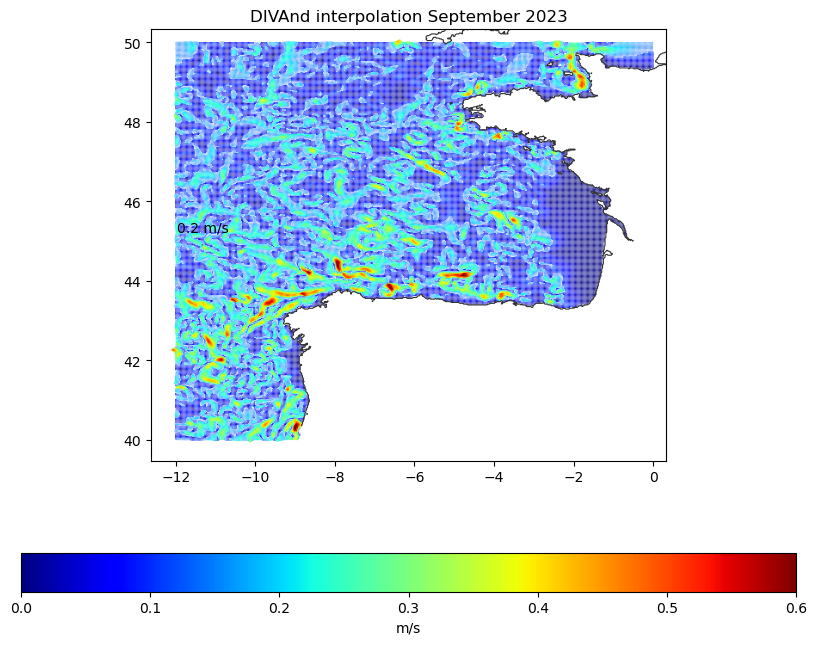

Python: None

In [73]:
color = sqrt.(uri.^2 + vri.^2)
clf()
figure(figsize=(10,8))
r = CartesianIndices(( 1:2:size(mask,1) ,1:2:size(mask,2)))
r = CartesianIndices(( 1:1:size(mask,1) ,1:1:size(mask,2)))
q = quiver(xi[r],yi[r],uri[r],vri[r],color[r],scale=50,cmap="jet")
quiverkey(q,0.1,0.5,0.2,"0.2 m/s")
colorbar(orientation="horizontal",label="m/s")
clim(0,0.6)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
#= xlim(-6,-2)
ylim(43,49)
=#
title("DIVAnd interpolation September 2023")
set_aspect_ratio(1.0)

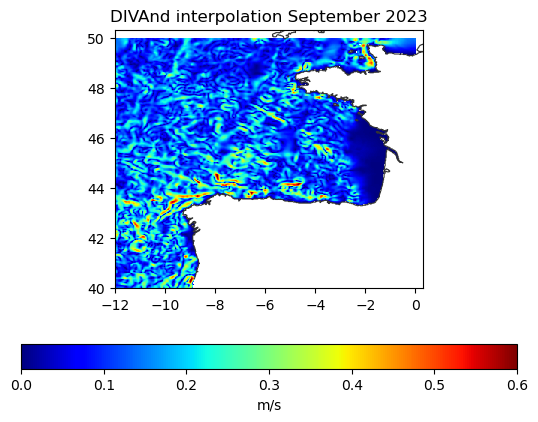

Python: None

In [72]:
pcolormesh(xi[r],yi[r],color[r],cmap="jet")
colorbar(orientation="horizontal",label="m/s")
clim(0,0.6)
contour(mlon_subset,mlat_subset,mdata_subset',[0.5],colors=[[0.2,0.2,0.2]],linewidths=0.8)
#= xlim(-6,-2)
ylim(43,49)
=#
title("DIVAnd interpolation September 2023")
set_aspect_ratio(1.0)